## <b>Tasks</b>

- Follow the example notebooks to cluster either the loans_train dataset or the bank dataset after it has been prepared for ML (i.e. the result of Lab 2). That is, there is no need to use a data preprocessing pipeline. Use the k-means clustering algorithm and visualise the clustering. Pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters.

- Plot the sum of squared distances from the data points to the k-Means clusters' centres for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one you used in Task 2), compute a new k-Means clustering.

- Implement and plot the results of the Silhouette method for determining the best value of k for k-Means. Compare the results of the Elbow method to the results of the Silhouette method.

- Apply another clustering algorithm (from the ones available in scikit-learn, e.g. DBSCAN) to the same dataset and an appropriate manifold-learning technique to visualise the clustering.

In [57]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, cluster, manifold
from sklearn.cluster import DBSCAN
from sklearn.manifold import MDS, TSNE
import matplotlib.pyplot as plt



In [5]:
df = pd.read_csv("../Lab2/bank_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (2000, 40)


### Rescale the Data

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

## Task 1

### MDS and T-SNE visualization

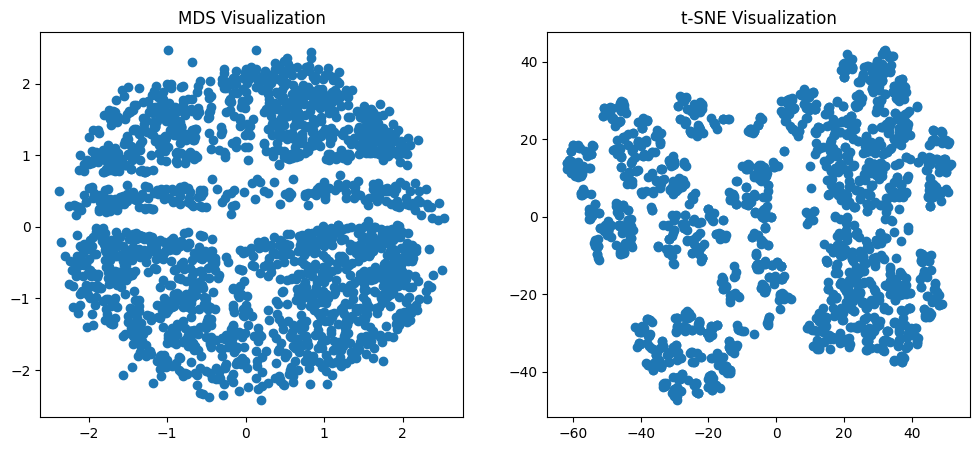

In [15]:
mds = MDS(n_components=2, random_state=42)
mds_results = mds.fit_transform(data)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(mds_results[:, 0], mds_results[:, 1])
plt.title("MDS Visualization")

# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title("t-SNE Visualization")

plt.show()


It's not the easiest to tell but from these graphs I can make out 7 different groups, it is easiest to see in the MDS Visualization

### Scatterplot Function (to be used below for visualising a clustering)

In [16]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### K-Means Clustering

In [29]:
k = 7

In [30]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [31]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [40]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


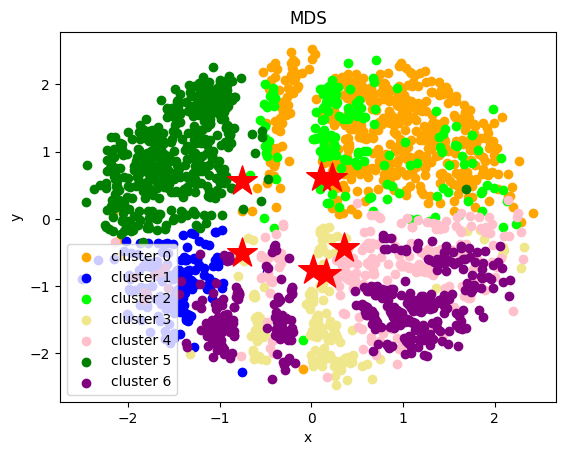

In [41]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

From the MDS graph with k = 7 we see notice the following:

- Cluster 5 has few overlaps and is very distinct.
- Cluster 1 is also distinct but overlaps a bit with 6
- Cluster 6 is quite spread out
- Cluster 3 is spread out as well
- Cluster 0 is keeps together for the most part with a small section split off
- Cluster 2 overlaps with cluster 0 so it seems they are very similar.
- Cluster 4 and Cluster 6 and Cluster 3 seem to have some similarities as they form their own bigger cluster together.

In [35]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


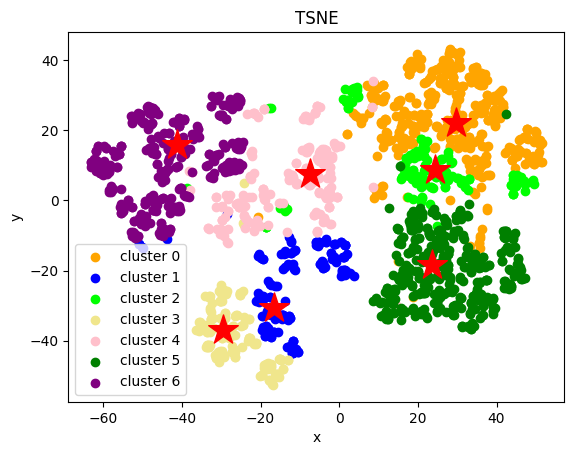

In [39]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

From the t-SNE graph with k = 7 we see notice the following:

- Definitely more distinguishable from the MDS graph, as less overlapping
- All clusters have their data tightly packed except for cluster 4 and cluster 2
- Cluster 2, Cluster 4, Cluster 6, Cluster 3 seem to be overlapping which is same as the MDS graph.

### Task 3 - Elbow Method

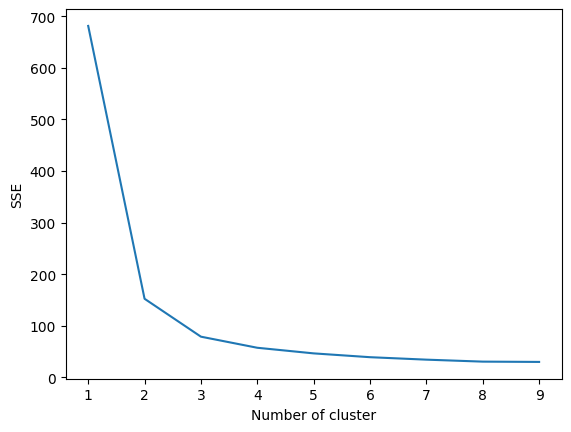

In [43]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris['feature_names'])

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(X) 
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

We can see from the elbow method it thinks k = 3 is the ideal k value for our dataset. This is significantly less than the previous selected k value.

In [44]:
k = 3

clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

transformation complete


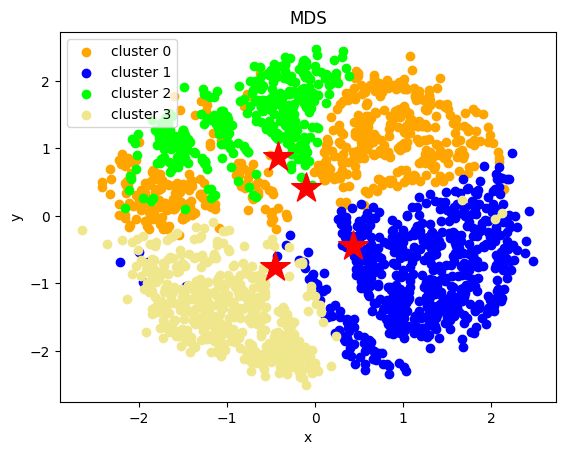

In [47]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

transformation complete


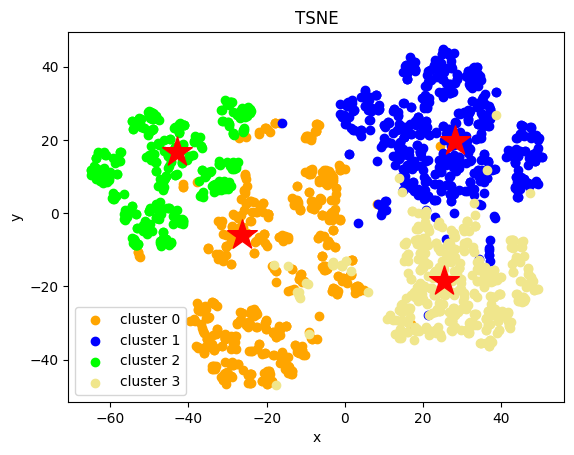

In [48]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

## Task 4 - Silhouette Method

For n_clusters=2, The Silhouette Coefficient is 0.6810461692117462
For n_clusters=3, The Silhouette Coefficient is 0.5528190123564095
For n_clusters=4, The Silhouette Coefficient is 0.49805050499728737
For n_clusters=5, The Silhouette Coefficient is 0.4887488870931056
For n_clusters=6, The Silhouette Coefficient is 0.47120980404812607
For n_clusters=7, The Silhouette Coefficient is 0.3190629474617504
For n_clusters=8, The Silhouette Coefficient is 0.3349019259889924
For n_clusters=9, The Silhouette Coefficient is 0.45615425457605485
For n_clusters=10, The Silhouette Coefficient is 0.30020970992205814
For n_clusters=11, The Silhouette Coefficient is 0.2695037394765205
For n_clusters=12, The Silhouette Coefficient is 0.3216045895130947
For n_clusters=13, The Silhouette Coefficient is 0.2998401610941955
For n_clusters=14, The Silhouette Coefficient is 0.26719821203589805


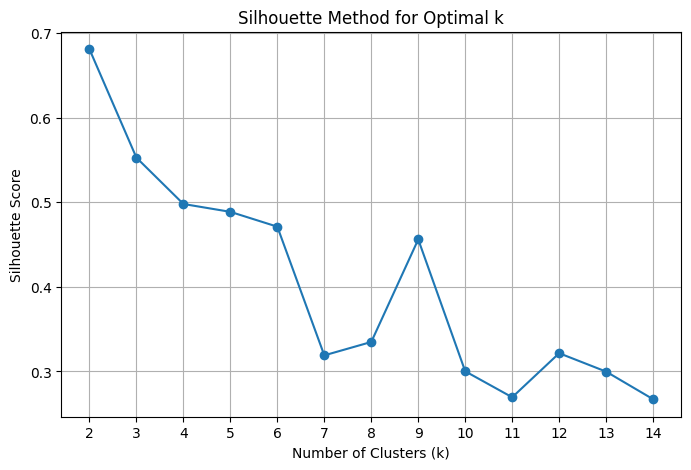

In [52]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

X = load_iris().data
y = load_iris().target
   
silhouette_scores = {}   
for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    silhouette_scores[n_cluster] = sil_coeff
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
    
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.xticks(range(2, 15))
plt.grid(True)
plt.show()    

From this we see that k = 2 has the highest silhouette coefficient which means it will have the most tight clusters however that would be fine for a simple dataset but for ours we need more meaningful categories, k = 3 is the 2nd highest which would line up with the selection from the elbow method, however I think for our dataset having only 3 clusters is not enough, I would think k = 5 is the best choice looking at these results. After k = 5 the silhouette coefficient drops greatly meaning the choices after that would not be the greatest as we can see when we looked at the MHS and t-SNE graphs above for k = 7, there was heavy overlapping. 

So comparing this with the elbow method, it also points to k = 3 for the most tightly packed clusters, however is this right for our dataset? I believe even if k = 5 is not as tight it is still acceptable and perhaps the clusters will be more specific and less generalised in terms of what they represent.

## Task 5 - DBSCAN

DBSCAN found 12 clusters (excluding noise).


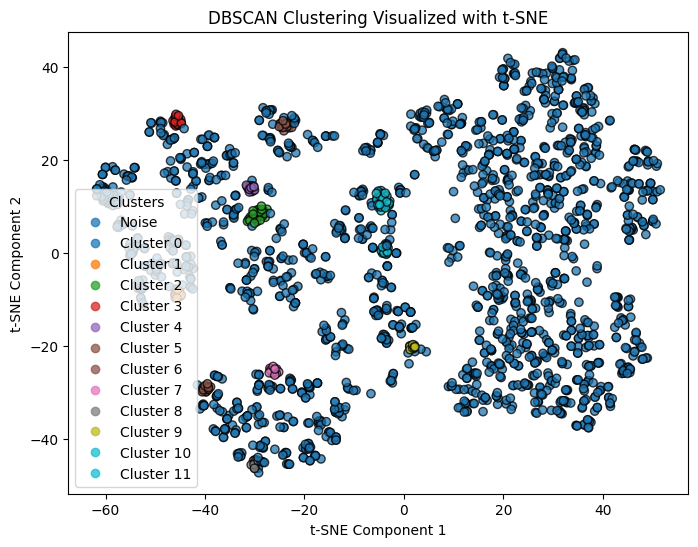

In [64]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(data)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data)

unique_labels = set(labels)
num_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print(f"DBSCAN found {num_clusters} clusters")

colors = np.array(labels)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, cmap='tab10', edgecolors='k', alpha=0.75)
plt.title("DBSCAN Clustering with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

handles, labels_ = scatter.legend_elements()
legend_labels = [f"Cluster {int(label)}" if int(label) != -1 else "Noise" for label in np.unique(labels)]
plt.legend(handles, legend_labels, title="Clusters")
plt.show()
